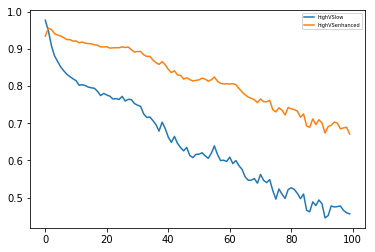

In [5]:
import os
import sys
#dir_path = os.path.dirname(os.path.realpath(__file__))
dir_path = "/Users/neda/HiCPlus_pytorch/src"
import numpy as np
import argparse
import cooler
import torch
from torch.autograd import Variable
from scipy.stats.stats import pearsonr
model_path = dir_path + "/models"
utils_path = dir_path + "/utils"
sys.path.insert(0, model_path)
sys.path.insert(0, utils_path)
import model
import utils
"""
args = {
    "low_res_frames_path" : "/Users/neda/prostate-samples/divided-data/RandDown-PCa13266-chr18.npy",
    "low_res_frames_index_path" : "/Users/neda/prostate-samples/divided-data/RandDown-PCa13266-chr18-index.npy",
    "low_res_HiC_path" : "/Users/neda/HiCPlus_pytorch/data/GM12878_primary/10kb_resolution_intrachromosomal_down16/chr18_10kb_down.RAWobserved_npy_form_tmp.npy",
    "high_res_HiC_path" : "/Users/neda/HiCPlus_pytorch/data/GM12878_primary/10kb_resolution_intrachromosomal/chr18/MAPQG0/chr18_10kb.RAWobserved_npy_form_tmp.npy",
    #"model_path" : "/Users/neda/HiCPlus_pytorch/src/learned-networks/down16-res10000(up)"
    "model_path" : "/Users/neda/HiCPlus_pytorch/src/learned-networks/down16-res10000(up-wo-min)"

}
"""
args = {
    "low_res_frames_path" : "/Users/neda/HiCPlus_pytorch/data/divided-data/GM12878_primary/10kb_resolution/chr18-22(down16)(Up).npy",
    "low_res_frames_index_path" : "/Users/neda/HiCPlus_pytorch/data/divided-data/GM12878_primary/10kb_resolution/chr18-22(Up)-index.npy",
    "low_res_HiC_path" : "/Users/neda/HiCPlus_pytorch/data/GM12878_primary/10kb_resolution_intrachromosomal_down16/chr18_10kb_down.RAWobserved_npy_form_tmp.npy",
    "high_res_HiC_path" : "/Users/neda/HiCPlus_pytorch/data/GM12878_primary/10kb_resolution_intrachromosomal/chr18/MAPQG0/chr18_10kb.RAWobserved_npy_form_tmp.npy",
    #"model_path" : "/Users/neda/HiCPlus_pytorch/src/learned-networks/down16-res10000(up)"
    "model_path" : "/Users/neda/HiCPlus_pytorch/src/learned-networks/down16-res10000(up-wo-min)"

}

use_gpu = 0
HiC_max_value = 100
model = model.Net(40, 28)
model.load_state_dict(torch.load(args['model_path']))
model = model.float()
if use_gpu:
    model = model.cuda()

chrN = 18
low_resolution_samples = np.load(args['low_res_frames_path'])
low_resolution_samples = np.expand_dims(low_resolution_samples, axis = 1)
lowres_set = torch.from_numpy(low_resolution_samples).float()
enhanced_set = model(Variable(lowres_set))
enhanced_set = enhanced_set.data.cpu().numpy()
enhanced_set = np.reshape(enhanced_set, (enhanced_set.shape[0], enhanced_set.shape[2], enhanced_set.shape[3]))
indices = np.load(args['low_res_frames_index_path'])
chrN_index = np.where(indices[:,0]==chrN)[0]
low_chr_mat = np.load(args['low_res_HiC_path'])
enhanced_chr_mat = np.load(args['low_res_HiC_path'])
for i in chrN_index:
    x_pos = indices[i,1]
    y_pos = indices[i,2]
    enhanced_chr_mat[x_pos+6:x_pos+34,y_pos+6:y_pos+34] = enhanced_set[i,:,:]

iu = np.triu_indices(enhanced_chr_mat.shape[0],1)
il = (iu[1],iu[0])
enhanced_chr_mat[il]=enhanced_chr_mat[iu]
"""
average_chr_mat = np.load(args['low_res_HiC_path'])
average_chr_mat[np.isnan(average_chr_mat)] = 0
chr_length = average_chr_mat.shape[0]
low_chr_mat2 = np.zeros((chr_length+6,chr_length+6))
low_chr_mat2[3:chr_length+3,3:chr_length+3] = low_chr_mat
for i1 in range(chr_length):
    for i2 in range(chr_length):
        average_chr_mat[i1,i2] = np.mean(low_chr_mat2[i1:i1+6,i2:i2+6])
"""
high_chr_mat = np.load(args['high_res_HiC_path'])
def vec_of_dist(matrix, x):
    return([matrix[i,i+x] for i in range(matrix.shape[1]-x)])
import matplotlib.pyplot as plt
highVSlow_corr_list = []
highVSenhanced_corr_list = []
highVSaverage_corr_list = []
for dist in range(100):
    low_res_vec = vec_of_dist(low_chr_mat, dist)
    high_res_vec = vec_of_dist(high_chr_mat, dist)
    enhanced_vec = vec_of_dist(enhanced_chr_mat, dist)
    #average_vec = vec_of_dist(average_chr_mat, dist)
    highVSlow_corr_list.append(pearsonr(low_res_vec, high_res_vec)[0])
    highVSenhanced_corr_list.append(pearsonr(high_res_vec, enhanced_vec)[0])
    #highVSaverage_corr_list.append(pearsonr(high_res_vec, average_vec)[0])
#fig = plt.figure()
plt.plot(highVSlow_corr_list, label = "highVSlow")
plt.plot(highVSenhanced_corr_list, label = "highVSenhanced")
#plt.plot(highVSaverage_corr_list, label = "highVSaverage")
plt.legend(loc='upper right', prop={'size': 5})
plt.show()
#fig.savefig("/Users/neda/HiCPlus_pytorch/results/down16-res10000(up)-corr.png")


In [4]:
lb = 2000
ub = 2010
print(16*low_chr_mat[lb:ub,lb:ub])
print(enhanced_chr_mat[lb:ub,lb:ub])
print(high_chr_mat[lb:ub,lb:ub])

[[1200  384  256  112   64   80   16   16   64   32]
 [ 384 1104  544  240   96   80  112   48   80   80]
 [ 256  544  912  368  144  128   96   48   48  112]
 [ 112  240  368 1152  192  192   64   48   48   80]
 [  64   96  144  192  832  240  112   80   64   48]
 [  80   80  128  192  240 1728  288  144  224  112]
 [  16  112   96   64  112  288 1120  208  128   96]
 [  16   48   48   48   80  144  208  736  192  112]
 [  64   80   48   48   64  224  128  192 1072  368]
 [  32   80  112   80   48  112   96  112  368 1472]]
[[1117  400  223  133   64   86   46   34   53   41]
 [ 400 1197  431  216   99   98   83   49   59   62]
 [ 223  431 1063  336  131  119   73   44   59   77]
 [ 133  216  336 1141  249  191   88   51   54   67]
 [  64   99  131  249  805  312   82   56   66   63]
 [  86   98  119  191  312 1455  380  155  168   94]
 [  46   83   73   88   82  380 1045  228  153  118]
 [  34   49   44   51   56  155  228  773  186  119]
 [  53   59   59   54   66  168  153  186 102